In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import os
import json
import re
import pandas as pd

# ================== 환경 설정 ==================
ENV = "s"   # 또는 "j"

PREFIX = {
    "s": r"C:\Users\swoo7246\Downloads\CTIGEN_ver3",
    "j": r"C:\Users\kiera\Desktop\workspace\65_CTIGEN_ver3"
}[ENV]


malware_to_hash = {
    "Babuk": "8203c2f00ecd3ae960cb3247a7d7bfb35e55c38939607c85dbdb5c92f0495fa9",
    "AbbadonRAT": "74f58ab637713ca0463c3842cd71176a887b132d13d32f9841c03f59c359c6d7",
    "BPFDoor" : "afa8a32ec29a31f152ba20a30eb483520fe50f2dce6c9aa9135d88f7c9c511d7",
    "Emotet" : "76816ba1a506eba7151bce38b3e6d673362355063c8fd92444b6bec5ad106c21",
    "Emotet2" : "249269aae1e8a9c52f7f6ae93eb0466a5069870b14bf50ac22dc14099c2655db",
    "IISerpent" : "aa34ecb2922ce8a8066358a1d0ce0ff632297037f8b528e3a37cd53477877e47",
    "RaccoonStealer" : "0123b26df3c79bac0a3fda79072e36c159cfd1824ae3fd4b7f9dea9bda9c7909",
    "new_sample" : "1bc5621a4818f2124ac085da21f607ca"
}


test_code = {
"BPFDoor" : {
    "baseline" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\wo_filter\wo_top\afa8a32ec29a31f152ba20a30eb483520fe50f2dce6c9aa9135d88f7c9c511d7.json",
    "palmtree" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree\wo_top\afa8a32ec29a31f152ba20a30eb483520fe50f2dce6c9aa9135d88f7c9c511d7.json",
    "ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\ssdeep\wo_top\afa8a32ec29a31f152ba20a30eb483520fe50f2dce6c9aa9135d88f7c9c511d7.json",
    "tlsh" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh\wo_top\afa8a32ec29a31f152ba20a30eb483520fe50f2dce6c9aa9135d88f7c9c511d7.json",
    "palmtree_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_ssdeep\wo_top\afa8a32ec29a31f152ba20a30eb483520fe50f2dce6c9aa9135d88f7c9c511d7.json",
    "tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh_ssdeep\wo_top\afa8a32ec29a31f152ba20a30eb483520fe50f2dce6c9aa9135d88f7c9c511d7.json",
    "palmtree_tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_tlsh_ssdeep\wo_top\afa8a32ec29a31f152ba20a30eb483520fe50f2dce6c9aa9135d88f7c9c511d7.json",
    },

"AbbadonRAT" : {
    "baseline" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\wo_filter\wo_top\74f58ab637713ca0463c3842cd71176a887b132d13d32f9841c03f59c359c6d7.json",
    "palmtree" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree\wo_top\74f58ab637713ca0463c3842cd71176a887b132d13d32f9841c03f59c359c6d7.json",
    "ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\ssdeep\wo_top\74f58ab637713ca0463c3842cd71176a887b132d13d32f9841c03f59c359c6d7.json",
    "tlsh" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh\wo_top\74f58ab637713ca0463c3842cd71176a887b132d13d32f9841c03f59c359c6d7.json",
    "palmtree_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_ssdeep\wo_top\74f58ab637713ca0463c3842cd71176a887b132d13d32f9841c03f59c359c6d7.json",
    "tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh_ssdeep\wo_top\74f58ab637713ca0463c3842cd71176a887b132d13d32f9841c03f59c359c6d7.json",
    "palmtree_tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_tlsh_ssdeep\wo_top\74f58ab637713ca0463c3842cd71176a887b132d13d32f9841c03f59c359c6d7.json",
    },

"Babuk" : {
    "baseline" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\wo_filter\wo_top\8203c2f00ecd3ae960cb3247a7d7bfb35e55c38939607c85dbdb5c92f0495fa9.json",
    "palmtree" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree\wo_top\8203c2f00ecd3ae960cb3247a7d7bfb35e55c38939607c85dbdb5c92f0495fa9.json",
    "ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\ssdeep\wo_top\8203c2f00ecd3ae960cb3247a7d7bfb35e55c38939607c85dbdb5c92f0495fa9.json",
    "tlsh" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh\wo_top\8203c2f00ecd3ae960cb3247a7d7bfb35e55c38939607c85dbdb5c92f0495fa9.json",
    "palmtree_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_ssdeep\wo_top\8203c2f00ecd3ae960cb3247a7d7bfb35e55c38939607c85dbdb5c92f0495fa9.json",
    "tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh_ssdeep\wo_top\8203c2f00ecd3ae960cb3247a7d7bfb35e55c38939607c85dbdb5c92f0495fa9.json",
    "palmtree_tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_tlsh_ssdeep\wo_top\8203c2f00ecd3ae960cb3247a7d7bfb35e55c38939607c85dbdb5c92f0495fa9.json",
    },

"Emotet" : {
    "baseline" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\wo_filter\wo_top\76816ba1a506eba7151bce38b3e6d673362355063c8fd92444b6bec5ad106c21.json",
    "palmtree" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree\wo_top\76816ba1a506eba7151bce38b3e6d673362355063c8fd92444b6bec5ad106c21.json",
    "ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\ssdeep\wo_top\76816ba1a506eba7151bce38b3e6d673362355063c8fd92444b6bec5ad106c21.json",
    "tlsh" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh\wo_top\76816ba1a506eba7151bce38b3e6d673362355063c8fd92444b6bec5ad106c21.json",
    "palmtree_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_ssdeep\wo_top\76816ba1a506eba7151bce38b3e6d673362355063c8fd92444b6bec5ad106c21.json",
    "tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh_ssdeep\wo_top\76816ba1a506eba7151bce38b3e6d673362355063c8fd92444b6bec5ad106c21.json",
    "palmtree_tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_tlsh_ssdeep\wo_top\76816ba1a506eba7151bce38b3e6d673362355063c8fd92444b6bec5ad106c21.json",
  } ,

"Emotet2" : {      
    "baseline" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\wo_filter\wo_top\249269aae1e8a9c52f7f6ae93eb0466a5069870b14bf50ac22dc14099c2655db.json",
    "palmtree" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree\wo_top\249269aae1e8a9c52f7f6ae93eb0466a5069870b14bf50ac22dc14099c2655db.json",
    "ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\ssdeep\wo_top\249269aae1e8a9c52f7f6ae93eb0466a5069870b14bf50ac22dc14099c2655db.json",
    "tlsh" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh\wo_top\249269aae1e8a9c52f7f6ae93eb0466a5069870b14bf50ac22dc14099c2655db.json",
    "palmtree_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_ssdeep\wo_top\249269aae1e8a9c52f7f6ae93eb0466a5069870b14bf50ac22dc14099c2655db.json",
    "tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh_ssdeep\wo_top\249269aae1e8a9c52f7f6ae93eb0466a5069870b14bf50ac22dc14099c2655db.json",
    "palmtree_tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_tlsh_ssdeep\wo_top\249269aae1e8a9c52f7f6ae93eb0466a5069870b14bf50ac22dc14099c2655db.json",
 },

"IISerpent" : {
    "baseline" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\wo_filter\wo_top\aa34ecb2922ce8a8066358a1d0ce0ff632297037f8b528e3a37cd53477877e47.json",
    "palmtree" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree\wo_top\aa34ecb2922ce8a8066358a1d0ce0ff632297037f8b528e3a37cd53477877e47.json",
    "ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\ssdeep\wo_top\aa34ecb2922ce8a8066358a1d0ce0ff632297037f8b528e3a37cd53477877e47.json",
    "tlsh" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh\wo_top\aa34ecb2922ce8a8066358a1d0ce0ff632297037f8b528e3a37cd53477877e47.json",
    "palmtree_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_ssdeep\wo_top\aa34ecb2922ce8a8066358a1d0ce0ff632297037f8b528e3a37cd53477877e47.json",
    "tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh_ssdeep\wo_top\aa34ecb2922ce8a8066358a1d0ce0ff632297037f8b528e3a37cd53477877e47.json",
    "palmtree_tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_tlsh_ssdeep\wo_top\aa34ecb2922ce8a8066358a1d0ce0ff632297037f8b528e3a37cd53477877e47.json",
  },

"RaccoonStealer" : {
    "baseline" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\wo_filter\wo_top\0123b26df3c79bac0a3fda79072e36c159cfd1824ae3fd4b7f9dea9bda9c7909.json",
    "palmtree" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree\wo_top\0123b26df3c79bac0a3fda79072e36c159cfd1824ae3fd4b7f9dea9bda9c7909.json",
    "ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\ssdeep\wo_top\0123b26df3c79bac0a3fda79072e36c159cfd1824ae3fd4b7f9dea9bda9c7909.json",
    "tlsh" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh\wo_top\0123b26df3c79bac0a3fda79072e36c159cfd1824ae3fd4b7f9dea9bda9c7909.json",
    "palmtree_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_ssdeep\wo_top\0123b26df3c79bac0a3fda79072e36c159cfd1824ae3fd4b7f9dea9bda9c7909.json",
    "tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh_ssdeep\wo_top\0123b26df3c79bac0a3fda79072e36c159cfd1824ae3fd4b7f9dea9bda9c7909.json",
    "palmtree_tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_tlsh_ssdeep\wo_top\0123b26df3c79bac0a3fda79072e36c159cfd1824ae3fd4b7f9dea9bda9c7909.json",
  },

"new_sample" : {
    "baseline" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\wo_filter\wo_top\1bc5621a4818f2124ac085da21f607ca.json",
    "palmtree" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree\wo_top\1bc5621a4818f2124ac085da21f607ca.json",
    "ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\ssdeep\wo_top\1bc5621a4818f2124ac085da21f607ca.json",
    "tlsh" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh\wo_top\1bc5621a4818f2124ac085da21f607ca.json",
    "palmtree_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_ssdeep\wo_top\1bc5621a4818f2124ac085da21f607ca.json",
    "tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\tlsh_ssdeep\wo_top\1bc5621a4818f2124ac085da21f607ca.json",
    "palmtree_tlsh_ssdeep" :  rf"{PREFIX}\mapping_py_result\w_DeGPT\palmtree_tlsh_ssdeep\wo_top\1bc5621a4818f2124ac085da21f607ca.json",
 }
}


In [25]:
import matplotlib.pyplot as plt
#------ Function precision recall ------#
thresholds = [i/100 for i in range(78,79)]
mode_names = list(next(iter(test_code.values())).keys())
metrics = {mode: {"precision": [], "recall": [], "f1": []} for mode in mode_names}

for mode in mode_names:
    print("=====================")
    print(f"Mode: {mode}")
    for t in thresholds:
        print(f"thresholds : {t}")
        print("{:16} {:>7} {:>7} {:>7}".format("Malware", "Prec.", "Recall", "F1"))

        total_tp = 0
        total_pred = 0
        total_gt = 0

        for malware, hashval in malware_to_hash.items():
            path = test_code[malware][mode]

            res = json.loads(open(path, encoding="utf8").read())
            gt = set(json.loads(open(f"function-report/{malware}.json", encoding="utf8").read()).keys())

            f_ctigen = {}
            for k, v in res.items():
                for _v in v:
                    if _v["Similarity"] >= t:
                        fn = k[:k.rindex("_")]
                        if fn not in f_ctigen:
                            f_ctigen[fn] = []
                        f_ctigen[fn].append(_v)

            tp = len(set(f_ctigen.keys()) & gt)
            pred = len(set(f_ctigen.keys()))
            gt_cnt = len(gt)

            try:
                prec = tp / pred
            except ZeroDivisionError:
                prec = 0.0
            recall = tp / gt_cnt if gt_cnt > 0 else 0.0

            try:
                f1 = 2 * (prec * recall / (prec + recall))
            except ZeroDivisionError:
                f1 = 0.0

            total_tp += tp
            total_pred += pred
            total_gt += gt_cnt

            print("{:16} {:7.3f} {:7.3f} {:7.3f}".format(malware, prec, recall, f1))

        # 총합(마이크로 평균)
        if total_pred > 0:
            total_prec = total_tp / total_pred
        else:
            total_prec = 0.0
        if total_gt > 0:
            total_recall = total_tp / total_gt
        else:
            total_recall = 0.0
        try:
            total_f1 = 2 * (total_prec * total_recall / (total_prec + total_recall))
        except ZeroDivisionError:
            total_f1 = 0.0

        metrics[mode]["precision"].append(total_prec)
        metrics[mode]["recall"].append(total_recall)
        metrics[mode]["f1"].append(total_f1)

        print("{:16} {:7.3f} {:7.3f} {:7.3f}".format("Total", total_prec, total_recall, total_f1))
        print()


Mode: baseline
thresholds : 0.78
Malware            Prec.  Recall      F1
Babuk              0.238   1.000   0.385
AbbadonRAT         0.031   1.000   0.060
BPFDoor            0.041   1.000   0.078
Emotet             0.002   1.000   0.005
Emotet2            0.020   1.000   0.038
IISerpent          0.002   1.000   0.004
RaccoonStealer     0.082   0.833   0.149
Total              0.017   0.957   0.033

Mode: palmtree
thresholds : 0.78
Malware            Prec.  Recall      F1
Babuk              0.333   1.000   0.500
AbbadonRAT         0.031   1.000   0.060
BPFDoor            0.042   1.000   0.080
Emotet             0.005   1.000   0.009
Emotet2            0.028   1.000   0.054
IISerpent          0.003   1.000   0.006
RaccoonStealer     0.114   0.833   0.200
Total              0.024   0.957   0.047

Mode: ssdeep
thresholds : 0.78
Malware            Prec.  Recall      F1
Babuk              0.455   1.000   0.625
AbbadonRAT         0.032   1.000   0.062
BPFDoor            0.042   1.000   0.080

In [10]:
#------ Behavior precision recall ------#

print("{:16} {:6}  {:6}".format("Name", "Prec.", "Recall"))

total_prec_num = 0
total_prec_den = 0
total_rec_num = 0
total_rec_den = 0

for malware in malware_to_hash.keys():
    # 결과 파일(res): final 폴더에서 병합된 DeGPT 매핑 결과
    res_path = f"final/{malware}_merged.json"
    # GT 파일(gt): 보고서 기반 Ground Truth (Report-Behavior)
    gt_path = f"all_text_rmdup/{malware}_updated.json"

    if not (os.path.exists(res_path) and os.path.exists(gt_path)):
        print(f"[WARN] Missing file for {malware}, skipping...")
        continue

    res = json.loads(open(res_path, encoding="utf8").read())
    gt = json.loads(open(gt_path, encoding="utf8").read())

    matched_indc = []
    matched_gt = []

    for r in res:
        for mr in r["Matched_Reports"]:
            if mr["Label"]:  # True Positive 매칭만
                matched_indc.append(r["Indicator"])
                matched_gt.append(mr["Report"])

    # Precision: 예측한 Indicator 중 GT DA에 존재하는 비율
    prec = len(set(matched_indc)) / len(gt["DA"]) if len(gt["DA"]) > 0 else 0.0
    # Recall: GT Report 중 매칭된 Report 존재 비율
    rec = len(set(matched_gt)) / len(gt["Report"]) if len(gt["Report"]) > 0 else 0.0

    total_prec_num += len(set(matched_indc))
    total_prec_den += len(gt["DA"])
    total_rec_num += len(set(matched_gt))
    total_rec_den += len(gt["Report"])

    print("{:16} {:.4f}  {:.4f}".format(malware, prec, rec))

# Micro-average (전체 합 기준)
total_prec = total_prec_num / total_prec_den if total_prec_den > 0 else 0.0
total_rec = total_rec_num / total_rec_den if total_rec_den > 0 else 0.0

print("{:16} {:.4f}  {:.4f}".format("Total", total_prec, total_rec))


Name             Prec.   Recall
Babuk            0.4828  0.9000
AbbadonRAT       0.6364  0.8148
BPFDoor          0.4211  0.8000
Emotet           0.0833  1.0000
Emotet2          0.1327  0.7500
IISerpent        0.0513  0.5714
RaccoonStealer   0.5036  0.9231
Total            0.3373  0.8295


In [ ]:
#------ Mapping precision recall ------#
print ("{:16} {:6}  {:6}".format("Name", "Prec.", "Recall"))
t_prec_1 = 0
t_prec_2 = 0
t_recall_1 = 0
t_recall_2 = 0

# del malware_to_hash["new_sample"]
for malware, hashval in malware_to_hash.items():
    if malware == "new_sample":
        print(f"{malware} → skipped")
        continue
    code_data = test_code[malware]
    print(malware)
    for name, path in code_data.items():
        # print (malware)
        indc = json.loads(open("final/{}_merged.json".format(malware), encoding="utf8").read())
        res = json.loads(open(path, encoding="utf8").read())
        gt = json.loads(open("function-report/{}.json".format(malware), encoding="utf8").read())
        f_ctigen = {}
        # print(malware)
        for k,v in res.items():
            # print(k)
            for _v in v:
                if _v["Similarity"] >= 0.78:
                    # print(_v["Similarity"])
                    if k[:k.rindex("_")] not in f_ctigen.keys():
                        f_ctigen[k[:k.rindex("_")]] = []
                    f_ctigen[k[:k.rindex("_")]].append(_v)
        
        indc_func_map = []
        corr_indc_func_map = []
        beh_func_map = []
        corr_beh_func_map = []
        
        for k,v in gt.items():
            for _v in v:
                beh_func_map.append(k+_v)
        
        for k,v in f_ctigen.items():
            # print (k)
            # print (gt.keys())
            if k in gt.keys():
                # print (k)
                for _v in v:
                    # print (k, _v["Indicator"])
                    indc_func_map.append(k+_v["Indicator"])
                    for _indc in indc:
                        if _indc["Indicator"] == _v["Indicator"]:
                            indc_beh_map = [mr["Report"] for mr in _indc["Matched_Reports"] if mr["Label"] == 1]
                            for indc_beh in indc_beh_map:
                                if indc_beh in gt[k]:
                                    corr_indc_func_map.append(k+_indc["Indicator"])
                                    corr_beh_func_map.append(k+indc_beh)

        try:                            
            prec = len(set(corr_indc_func_map))/len(set(indc_func_map))
        except:
            prec = 0
        recall = len(set(corr_beh_func_map))/len(set(beh_func_map))
        
        t_prec_1 += len(set(corr_indc_func_map))
        t_prec_2 += len(set(indc_func_map))
        t_recall_1 += len(set(corr_beh_func_map))
        t_recall_2 += len(set(beh_func_map))
        print ("{:16} {:.4f}  {:.4f}".format(name, prec, recall))

print ("{:16} {:.4f}  {:.4f}".format("Total", t_prec_1/t_prec_2, t_recall_1/t_recall_2))

Name             Prec.   Recall
Babuk
baseline         0.4545  0.4545
palmtree         0.4545  0.4545
ssdeep           0.4545  0.4545
tlsh             0.4545  0.4545
palmtree_ssdeep  0.4545  0.4545
tlsh_ssdeep      0.4545  0.4545
palmtree_tlsh_ssdeep 0.4545  0.4545
AbbadonRAT
baseline         0.0000  0.0000
palmtree         0.0000  0.0000
ssdeep           0.0000  0.0000
tlsh             0.0000  0.0000
palmtree_ssdeep  0.0000  0.0000
tlsh_ssdeep      0.0000  0.0000
palmtree_tlsh_ssdeep 0.0000  0.0000
BPFDoor
baseline         0.3333  0.2500
palmtree         0.3333  0.2500
ssdeep           0.3333  0.2500
tlsh             0.3333  0.2500
palmtree_ssdeep  0.3333  0.2500
tlsh_ssdeep      0.3333  0.2500
palmtree_tlsh_ssdeep 0.3333  0.2500
Emotet
baseline         0.3333  1.0000
palmtree         0.3333  1.0000
ssdeep           0.3333  1.0000
tlsh             0.3333  1.0000
palmtree_ssdeep  0.3333  1.0000
tlsh_ssdeep      0.3333  1.0000
palmtree_tlsh_ssdeep 0.3333  1.0000
Emotet2
baseline        

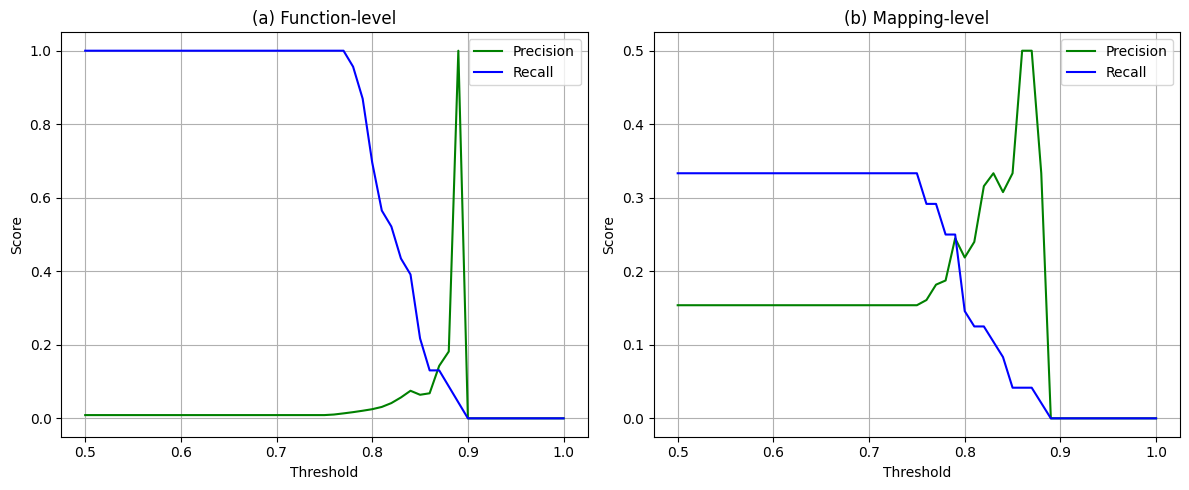

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# ===========================
# 설정
# ===========================
mode = "baseline"
thresholds = [i/100 for i in range(50, 101)]
# tau = 0.80  # 선택 기준

func_prec_list = []
func_rec_list = []
map_prec_list = []
map_rec_list = []

# ===========================
# Function-level Precision/Recall 계산
# ===========================
for t in thresholds:
    total_tp = total_pred = total_gt = 0
    for malware in malware_to_hash.keys():
        if malware == "new_sample": continue

        path = test_code[malware][mode]
        if not os.path.exists(path): continue

        res = json.loads(open(path, encoding="utf8").read())
        gt = set(json.loads(open(f"{PREFIX}/eval/function-report/{malware}.json", encoding="utf8").read()).keys())

        f_ctigen = {}
        for k,v in res.items():
            for _v in v:
                if _v["Similarity"] > t:
                    fn = k[:k.rindex("_")]
                    f_ctigen.setdefault(fn, []).append(_v)

        tp = len(set(f_ctigen.keys()) & gt)
        pred = len(set(f_ctigen.keys()))
        gt_cnt = len(gt)

        total_tp += tp
        total_pred += pred
        total_gt += gt_cnt

    prec = total_tp / total_pred if total_pred else 0
    rec = total_tp / total_gt if total_gt else 0

    func_prec_list.append(prec)
    func_rec_list.append(rec)

# ===========================
# Mapping-level Precision/Recall 계산
# ===========================
for t in thresholds:
    total_prec_num = total_prec_den = total_rec_num = total_rec_den = 0
    for malware in malware_to_hash.keys():
        if malware == "new_sample": continue

        res_map = json.loads(open(f"{PREFIX}/eval/final/{malware}_merged.json", encoding="utf8").read())
        gt = json.loads(open(f"{PREFIX}/eval/function-report/{malware}.json", encoding="utf8").read())

        pred_map = []
        corr_pred_map = []
        gt_map = []

        # GT Behavior 구성 (Function + Behavior)
        for fn, behs in gt.items():
            for b in behs:
                gt_map.append(fn+b)

        # Function → Indicator infer
        res_func = json.loads(open(test_code[malware][mode], encoding="utf8").read())
        inferred = {}
        for fn, items in res_func.items():
            for it in items:
                if it["Similarity"] > t:
                    base = fn[:fn.rindex("_")]
                    inferred.setdefault(base, []).append(it)

        # Mapping 성능 평가
        for fn, items in inferred.items():
            if fn not in gt: continue
            for it in items:
                pred_map.append(fn+it["Indicator"])
                for m in res_map:
                    if m["Indicator"] == it["Indicator"]:
                        behs = [mr["Report"] for mr in m["Matched_Reports"] if mr["Label"]]
                        for b in behs:
                            if b in gt[fn]:
                                corr_pred_map.append(fn+b)

        total_prec_num += len(set(corr_pred_map))
        total_prec_den += len(set(pred_map))
        total_rec_num += len(set(corr_pred_map))
        total_rec_den += len(gt_map)

    prec = total_prec_num / total_prec_den if total_prec_den else 0
    rec = total_rec_num / total_rec_den if total_rec_den else 0

    map_prec_list.append(prec)
    map_rec_list.append(rec)


# ===========================
# 그래프 출력
# ===========================
plt.figure(figsize=(12, 5))

# (a) Function-level
plt.subplot(1,2,1)
plt.plot(thresholds, func_prec_list, 'g-', label="Precision")
plt.plot(thresholds, func_rec_list, 'b-', label="Recall")
# plt.axvline(tau, color='red', linestyle='--')
# plt.text(tau+0.01, 0.35, f"{tau:.2f}", color='red')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("(a) Function-level")
plt.grid(True)
plt.legend()

# (b) Mapping-level
plt.subplot(1,2,2)
plt.plot(thresholds, map_prec_list, 'g-', label="Precision")
plt.plot(thresholds, map_rec_list, 'b-', label="Recall")
# plt.axvline(tau, color='red', linestyle='--')
# plt.text(tau+0.01, 0.15, f"{tau:.2f}", color='red')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("(b) Mapping-level")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
cross_points_map = []

for i in range(len(thresholds)-1):
    p1 = map_prec_list[i]
    r1 = map_rec_list[i]
    p2 = map_prec_list[i+1]
    r2 = map_rec_list[i+1]
    if (p1 - r1) * (p2 - r2) < 0:
        cross_points_map.append((thresholds[i], thresholds[i+1]))

print("Mapping-level 교차구간:", cross_points_map)


Mapping-level 교차구간: [(0.79, 0.8)]


#### Other docompilers

In [168]:
path = "cot/retdec"

retdec = json.loads(open("retdec_decompile_code.json", encoding="utf8").read())

ssig = "// ------------------------ Functions -------------------------"
esig = "// --------------------- Meta-Information ---------------------"

# print (retdec.keys())

for malware, hashval in malware_to_hash.items():
    print (malware, hashval)
    res = json.loads(open("cot/retdec/{}_result.json".format(hashval), encoding="utf8").read())
    gt = set(json.loads(open("function-report/{}.json".format(malware), encoding="utf8").read()).keys())
    # retdec = json.loads(open("report_sample/decompile_res/retdec_comment/{}_comments.json".format(hashval), encoding="utf8").read())
    print (gt)
    res_funcs = sorted(list(set([k[:k.rindex("_")] for k in res.keys()])))
    i=0
    print (len(res_funcs))
    for fretdec in retdec[malware+".c"]:
        tfname = "FUN_{:04}".format(i)
        fretdec_name = fretdec[fretdec.index(" ")+1:fretdec.index("(")]
        if tfname+"_1" not in res.keys():
            i+=1
            # print (tfname)
            continue
        # fidx = fretdec_name[fretdec_name.index("_")+1:]
        print (tfname, fretdec_name)
        '''
        for _gt in gt:
            if fidx.lower() in _gt.lower():
                print(tfname, _gt)
                break
        '''
        # print (fidx, tfname)
        i+=1
    
    # print (len(res_funcs), len(retdec[malware+".c"]))
    # break


Babuk 8203c2f00ecd3ae960cb3247a7d7bfb35e55c38939607c85dbdb5c92f0495fa9
{'FUN_00404620', 'FUN_004034b0', 'FUN_00402ae0', 'FUN_00402a30', 'FUN_00402d30'}
87
FUN_0000 function_401812
FUN_0001 function_401889
FUN_0002 function_40188d
FUN_0003 function_401b85
FUN_0004 function_401b86
FUN_0005 function_401bbe
FUN_0006 function_401bc4
FUN_0007 function_4022dc
FUN_0008 function_4025a0
FUN_0009 function_402770
FUN_0013 function_402e40
FUN_0014 function_402eb0
FUN_0015 function_402fc0
FUN_0016 function_403030
FUN_0018 function_4030c0
FUN_0019 function_4031d0
FUN_0020 function_403210
FUN_0021 function_403350
FUN_0022 function_403420
FUN_0024 function_4034f0
FUN_0025 function_403590
FUN_0026 function_403620
FUN_0027 function_403650
FUN_0028 function_403690
FUN_0029 function_4036e0
FUN_0030 function_403730
FUN_0031 function_403760
FUN_0032 function_4037b0
FUN_0033 function_403820
FUN_0034 function_403910
FUN_0035 function_403960
FUN_0036 function_4039c0
FUN_0037 function_403a00
FUN_0038 function_40

In [172]:
path = "cot/binaryninja"

# retdec = json.loads(open("retdec_decompile_code.json", encoding="utf8").read())

for malware, hashval in malware_to_hash.items():
    print (malware, hashval)
    res = json.loads(open("cot/retdec/{}_result.json".format(hashval), encoding="utf8").read())
    gt = set(json.loads(open("function-report/{}.json".format(malware), encoding="utf8").read()).keys())
    retdec = json.loads(open("report_sample/decompile_res/retdec_comment/{}_comments.json".format(hashval), encoding="utf8").read())
    print (gt)
    print()



Babuk 8203c2f00ecd3ae960cb3247a7d7bfb35e55c38939607c85dbdb5c92f0495fa9
{'FUN_00404620', 'FUN_004034b0', 'FUN_00402ae0', 'FUN_00402a30', 'FUN_00402d30'}

RaccoonStealer 0123b26df3c79bac0a3fda79072e36c159cfd1824ae3fd4b7f9dea9bda9c7909
{'FUN_00401000', 'entry', 'FUN_0040a2d7', 'FUN_0040a323', 'FUN_0040a198', 'FUN_0040a720'}

BPFDoor afa8a32ec29a31f152ba20a30eb483520fe50f2dce6c9aa9135d88f7c9c511d7
{'FUN_00401a30', 'FUN_00401380'}

IISerpent aa34ecb2922ce8a8066358a1d0ce0ff632297037f8b528e3a37cd53477877e47
{'FUN_10009a60'}

AbbadonRAT 74f58ab637713ca0463c3842cd71176a887b132d13d32f9841c03f59c359c6d7
{'GetSessionFiles', 'GetAuths', 'GetLoginFromCookies', 'GetCreditCards', 'GetCookies', 'ParseLog', 'CheckToken'}

Emotet 76816ba1a506eba7151bce38b3e6d673362355063c8fd92444b6bec5ad106c21
{'FUN_10005680'}

Emotet2 249269aae1e8a9c52f7f6ae93eb0466a5069870b14bf50ac22dc14099c2655db
{'FUN_00401f80'}

